# import libraries

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
import plotly.express as px

# Importing data

In [2]:
ath=pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

In [3]:
noc=pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')

In [4]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# join data in two ways

In [6]:
df=ath.merge(noc,on='NOC',how='left')

In [7]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# let's group the medals by region

In [8]:
df.groupby('region')['Medal'].count().nlargest(20).reset_index()

,region,Medal
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2068
4,France,1777
5,Italy,1637
6,Sweden,1536
7,Canada,1352
8,Australia,1349
9,Hungary,1135


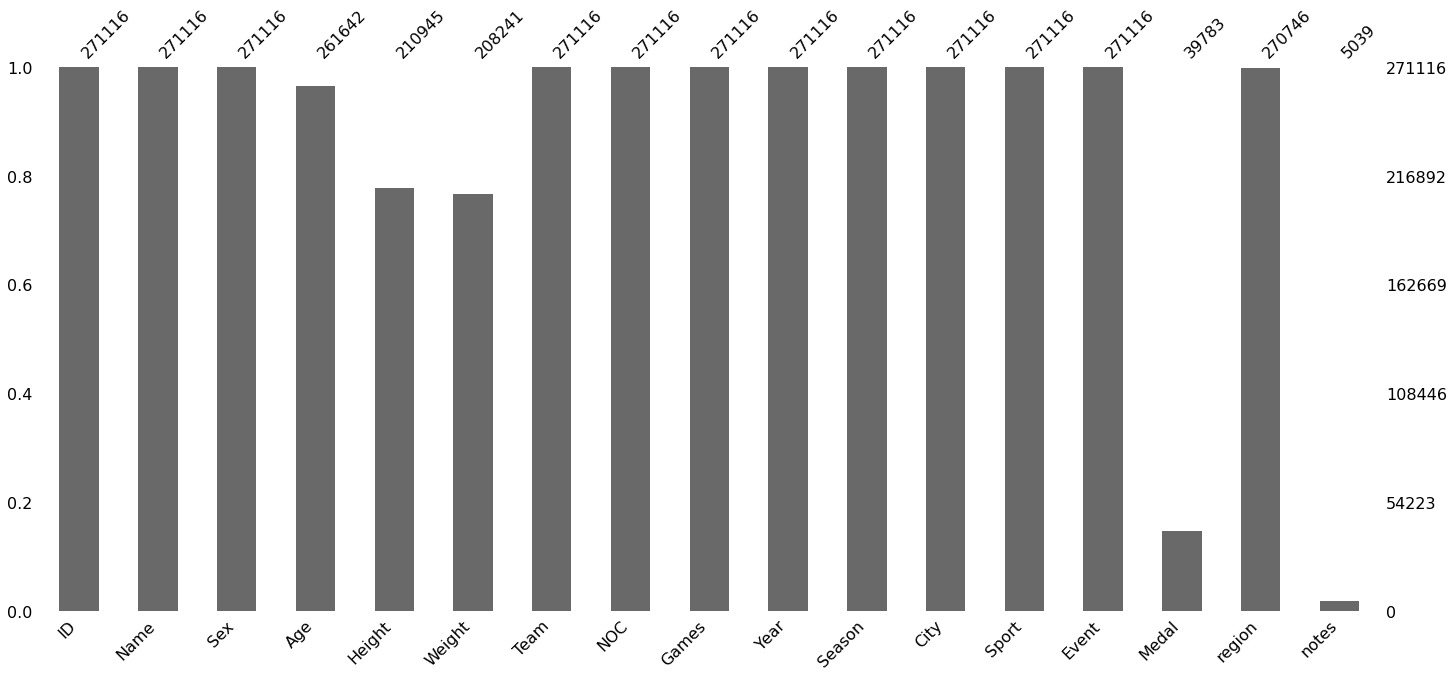

In [9]:
msn.bar(df)
plt.show()

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


Let's see the sum of zeros as a percentage then we can easily choose which column to drop

In [11]:
df.isnull().sum()/df.shape[0]

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
region    0.001365
notes     0.981414
dtype: float64

As you see 'notes' column should be dropped
because the amount of zeros is more than 50%

In [12]:
df.drop('notes',axis=1,inplace=True)

In [13]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [14]:
df[df['Weight']>80]['Weight']

4         82.0
5         82.0
6         82.0
7         82.0
8         82.0
          ... 
271090    95.0
271091    89.0
271111    89.0
271114    96.0
271115    96.0
Name: Weight, Length: 44854, dtype: float64

In [15]:
df.iloc[[3,6,9],[2,3]]

,Sex,Age
3,M,34.0
6,F,25.0
9,F,27.0


In [16]:
df[(df['Weight']>80) & (df['City']=='Barcelona')]
                        

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
137,50,Arvi Aavik,M,22.0,185.0,106.0,Estonia,EST,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN,Estonia
169,71,Juan Antonio Aball Delgado,M,27.0,172.0,82.0,Cuba,CUB,1992 Summer,1992,Summer,Barcelona,Canoeing,"Canoeing Men's Canadian Doubles, 500 metres",NaN,Cuba
170,71,Juan Antonio Aball Delgado,M,27.0,172.0,82.0,Cuba,CUB,1992 Summer,1992,Summer,Barcelona,Canoeing,"Canoeing Men's Canadian Doubles, 1,000 metres",NaN,Cuba
223,107,Carmine Abbagnale,M,30.0,182.0,90.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Pairs,Silver,Italy
228,108,Giuseppe Abbagnale,M,33.0,187.0,97.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Pairs,Silver,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270349,135235,Ronald Zoodsma,M,25.0,201.0,90.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Volleyball,Volleyball Men's Volleyball,Silver,Netherlands
270407,135261,Andrea Zorzi,M,26.0,201.0,102.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Volleyball,Volleyball Men's Volleyball,NaN,Italy
270644,135357,Ji Zubrick,M,28.0,188.0,161.0,Czechoslovakia,TCH,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Super-Heavyweight,NaN,Czech Republic
271015,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,25.0,200.0,93.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Volleyball,Volleyball Men's Volleyball,Silver,Netherlands


In [17]:
df[(df['Weight']>80) & (df['City']=='Barcelona')][['Team','City','Sport']]

,Team,City,Sport
137,Estonia,Barcelona,Wrestling
169,Cuba,Barcelona,Canoeing
170,Cuba,Barcelona,Canoeing
223,Italy,Barcelona,Rowing
228,Italy,Barcelona,Rowing
...,...,...,...
270349,Netherlands,Barcelona,Volleyball
270407,Italy,Barcelona,Volleyball
270644,Czechoslovakia,Barcelona,Weightlifting
271015,Netherlands,Barcelona,Volleyball


In [18]:
region_medal=df.groupby('region')['Medal'].count().nlargest(20).reset_index()

In [19]:
region_medal.head()

,region,Medal
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2068
4,France,1777


Let's see 'Sport' column values

In [20]:
df['Sport'].value_counts(normalize='True')

Athletics        0.142463
Gymnastics       0.098508
Swimming         0.085554
Shooting         0.042225
Cycling          0.040053
                   ...   
Racquets         0.000044
Jeu De Paume     0.000041
Roque            0.000015
Basque Pelota    0.000007
Aeronautics      0.000004
Name: Sport, Length: 66, dtype: float64

# Data visualization

Let's see medals by regions

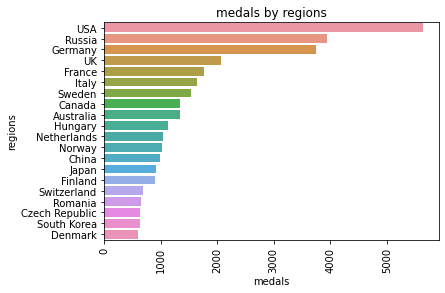

In [21]:
sns.barplot(y='region',x='Medal',data=region_medal)
plt.title('medals by regions')
plt.xlabel('medals')
plt.ylabel('regions')
plt.xticks(rotation=90)
plt.show()


In [22]:
df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

regions and partipants of gold medals

In [23]:
df[df['Medal']=='Gold'][['Name','region']]

,Name,region
3,Edgar Lindenau Aabye,Denmark
42,Paavo Johannes Aaltonen,Finland
44,Paavo Johannes Aaltonen,Finland
48,Paavo Johannes Aaltonen,Finland
60,Kjetil Andr Aamodt,Norway
...,...,...
270981,Zurab Zviadauri,Georgia
271009,Julia Zwehl,Germany
271016,"Ronald Ferdinand ""Ron"" Zwerver",Netherlands
271049,Henk Jan Zwolle,Netherlands


counting gold,silver,bronze medals

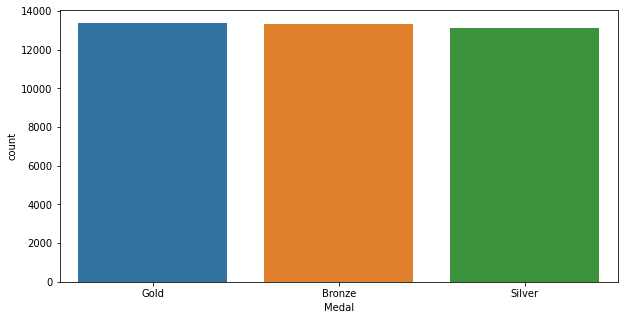

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='Medal', data=df)
plt.show()

how many participants take part per years

In [25]:
participants=df.groupby('Year')['Name'].count().reset_index()
participants

,Year,Name
0,1896,380
1,1900,1936
2,1904,1301
3,1906,1733
4,1908,3101
5,1912,4040
6,1920,4292
7,1924,5693
8,1928,5574
9,1932,3321


In [26]:
reg_medal=df.groupby(['Season','Medal']).size().reset_index()
reg_medal

,Season,Medal,0
0,Summer,Bronze,11409
1,Summer,Gold,11459
2,Summer,Silver,11220
3,Winter,Bronze,1886
4,Winter,Gold,1913
5,Winter,Silver,1896


let's make year,season and city as index

In [27]:
season=df.groupby(['Year','Season','City'],as_index='False').first()

In [28]:
season

ID                                Name  \
Year Season City                                                               
1896 Summer Athina                  1724              Aristidis Akratopoulos   
1900 Summer Paris                      4                Edgar Lindenau Aabye   
1904 Summer St. Louis                404         Louis Grenville "Lou" Abell   
1906 Summer Athina                   139              George "Ioannis" Abbot   
1908 Summer London                   635                     Alfredo Accorsi   
1912 Summer Stockholm                 15                Arvo Ossian Aaltonen   
1920 Summer Antwerpen                  3                 Gunnar Nielsen Aaby   
1924 Summer Paris                     15                Arvo Ossian Aaltonen   
     Winter Chamonix                 391                  Clarence John Abel   
1928 Summer Amsterdam                 47                Erling Rudolf Aastad   
     Winter Sankt Moritz             529     Karl Gustaf Emanuel Abrahamsson   
1932 Summer Los Angeles                8  Cornelia "Cor" Aalten (-Strannood)   
     Winter Lake Placid              746                         Goro Adachi   
1936 Summer Berlin                    31                   Evald rma (rman-)   
     Winter Garmisch-Partenkirchen   746                         Goro Adachi   
1948 Summer London                    17             Paavo Johannes Aaltonen   
     Winter Sankt Moritz             665               Gilbert Achard-Picard   
1952 Summer Helsinki                  10      Einar Ferdinand "Einari" Aalto   
     Winter Oslo                      40                     Roald Edgar Aas   
1956 Summer Melbourne                 46                          Hans Aasns   
            Stockholm               3479     Karl Vilhelm Nordstrm Ammitzbll   
     Winter Cortina d'Ampezzo         40                     Roald Edgar Aas   
1960 Summer Roma                      46                          Hans Aasns   
     Winter Squaw Valley              24                    Nils Egil Aaness   
1964 Summer Tokyo                     87        Rost'om Omeris dze Abashidze   
     Winter Innsbruck                 24                    Nils Egil Aaness   
1968 Summer Mexico City               28                    Jan-Erik Aarberg   
     Winter Grenoble                 137           Giordano Giulio Abbondati   
1972 Summer Munich                    28                    Jan-Erik Aarberg   
     Winter Sapporo                  363                          Kazumi Abe   
1976 Summer Montreal                  52                       Patrick Abada   
     Winter Innsbruck                363                          Kazumi Abe   
1980 Summer Moskva                    85             Alejandro Abascal Garca   
     Winter Lake Placid               11                  Jorma Ilmari Aalto   
1984 Summer Los Angeles               27                       Johan Aantjes   
     Winter Sarajevo                  26        Agnes Erika Aanonsen (-Eyde)   
1988 Summer Seoul                     29                Willemien Aardenburg   
     Winter Calgary                    5            Christine Jacoba Aaftink   
1992 Summer Barcelona                  1                           A Dijiang   
     Winter Albertville                5            Christine Jacoba Aaftink   
1994 Winter Lillehammer                5            Christine Jacoba Aaftink   
1996 Summer Atlanta                   13                  Minna Maarit Aalto   
1998 Winter Nagano                    20                  Kjetil Andr Aamodt   
2000 Summer Sydney                    12                   Jyri Tapani Aalto   
2002 Winter Salt Lake City             9                    Antti Sami Aalto   
2004 Summer Athina                    23                         Fritz Aanes   
2006 Winter Torino                    20                  Kjetil Andr Aamodt   
2008 Summer Beijing                   21           Ragnhild Margrethe Aamodt   
2010 Winter Vancouver                1

using seaborn scatterplot to extract height and weight of participants for sex

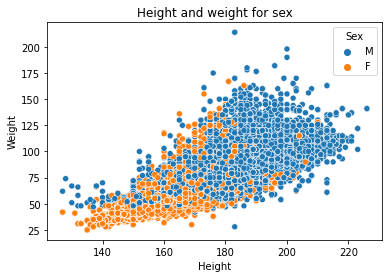

In [29]:
sns.scatterplot(x='Height',y='Weight',hue='Sex',data=df)
plt.title('Height and weight for sex')
plt.show()

In [30]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


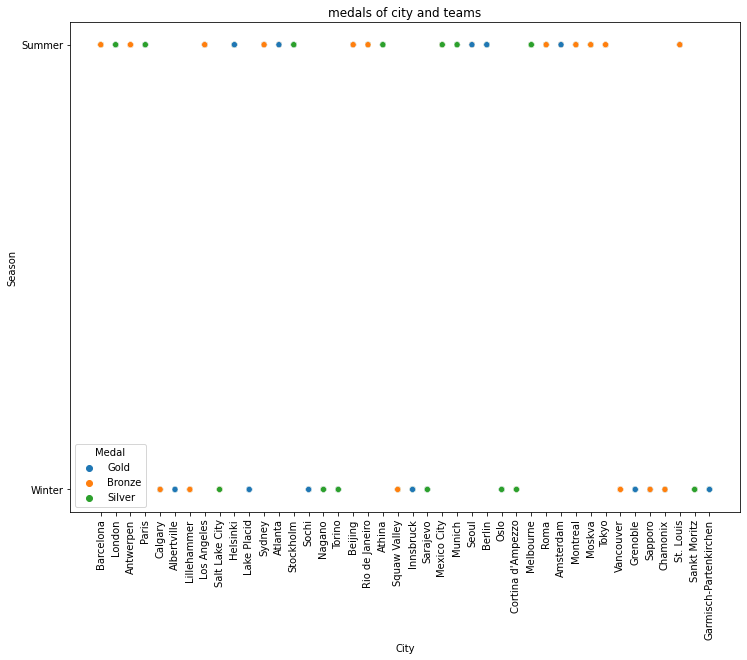

In [31]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='City', y='Season', hue='Medal', data=df)
plt.title('medals of city and teams')
plt.xticks(rotation=90)
plt.show()

let's see women medals per years

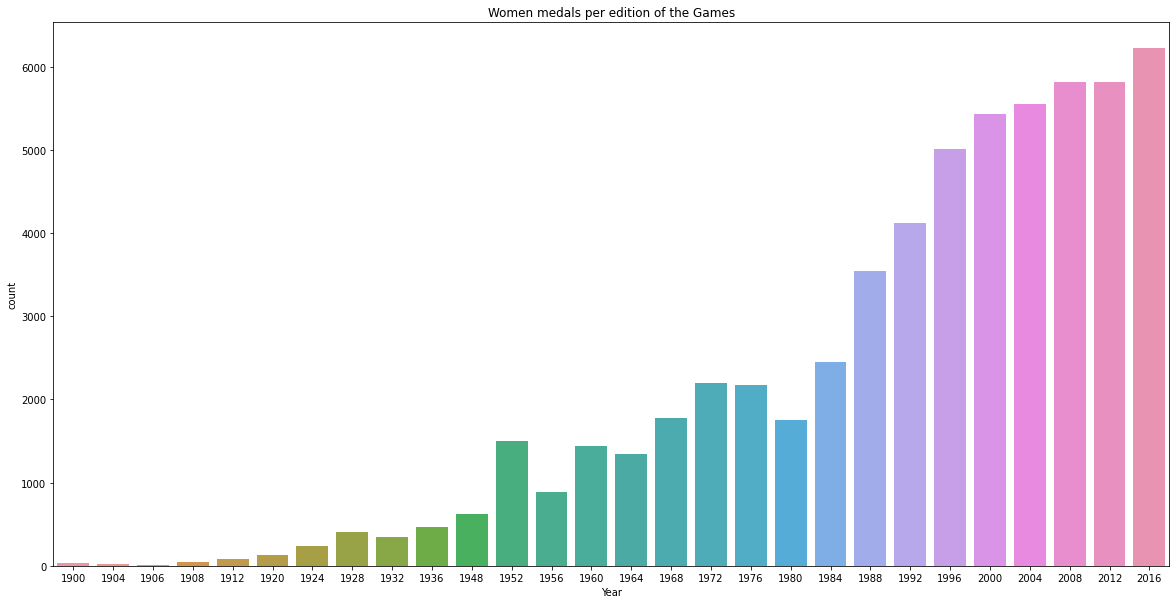

In [32]:

womenolympics = df[(df.Sex == 'F') &
                         (df.Season == 'Summer')]
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenolympics)
plt.title('Women medals per edition of the Games')
plt.show()

In [33]:
summer_medals=df.groupby(['region', 'Medal']).size().reset_index()
summer_medals.columns=['region', 'Medal', 'count']

In [34]:
summer_medals.pivot('region', 'Medal', 'count')

Medal,Bronze,Gold,Silver
region,,,
Afghanistan,2.0,NaN,NaN
Algeria,8.0,5.0,4.0
Argentina,91.0,91.0,92.0
Armenia,9.0,2.0,5.0
Australia,522.0,368.0,459.0
...,...,...,...
Venezuela,10.0,2.0,3.0
Vietnam,NaN,1.0,3.0
"Virgin Islands, US",NaN,NaN,1.0


In [35]:
summer_medals.pivot('region', 'Medal', 'count').fillna(0)

Medal,Bronze,Gold,Silver
region,,,
Afghanistan,2.0,0.0,0.0
Algeria,8.0,5.0,4.0
Argentina,91.0,91.0,92.0
Armenia,9.0,2.0,5.0
Australia,522.0,368.0,459.0
...,...,...,...
Venezuela,10.0,2.0,3.0
Vietnam,0.0,1.0,3.0
"Virgin Islands, US",0.0,0.0,1.0


In [36]:
summer_medals_20=summer_medals.pivot('region', 'Medal', 'count').fillna(0).sort_values(['Gold'], ascending=False).head(20)

Medals by Country

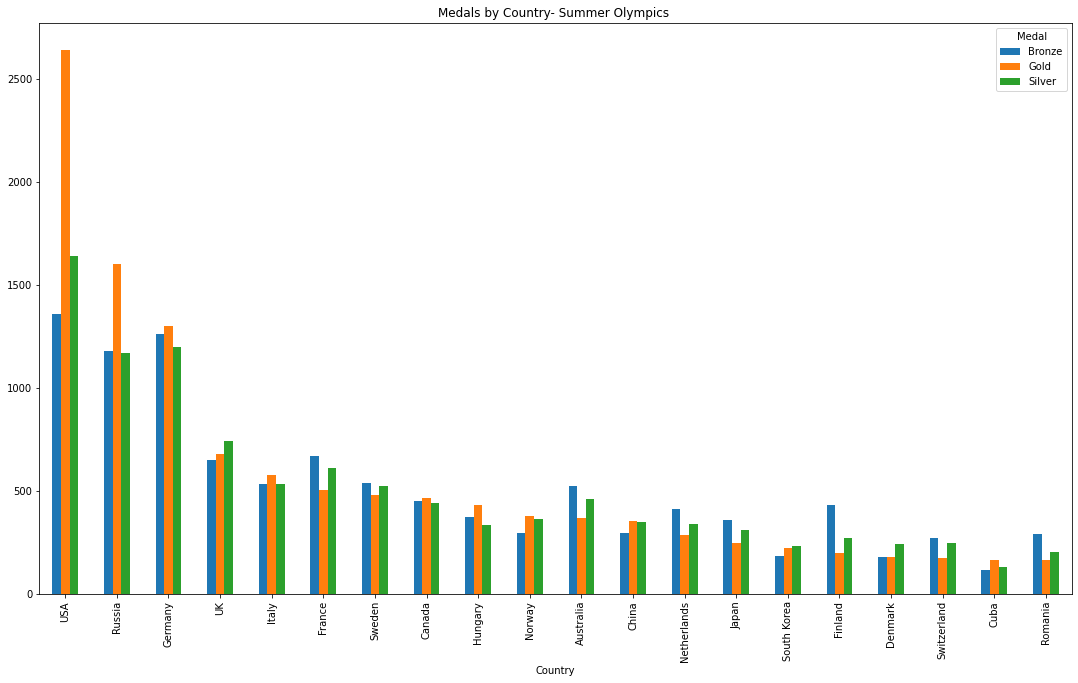

In [37]:
summer_medals_20.plot(kind='bar')
plt.xlabel('Country')
plt.title('Medals by Country- Summer Olympics ')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [38]:
winter_medals=df[df['Season']=='Winter'].groupby(['region', 'Medal']).size().reset_index()

In [39]:
winter_medals.head()

,region,Medal,0
0,Australia,Bronze,7
1,Australia,Gold,6
2,Australia,Silver,3
3,Austria,Bronze,103
4,Austria,Gold,79


In [40]:
winter_medals.columns=['region', 'Medal', 'count']

In [41]:
winter_medals_20=winter_medals.pivot(index='region', columns='Medal', values='count').sort_values('Gold', 
                                                                                                  ascending=False).head(20)

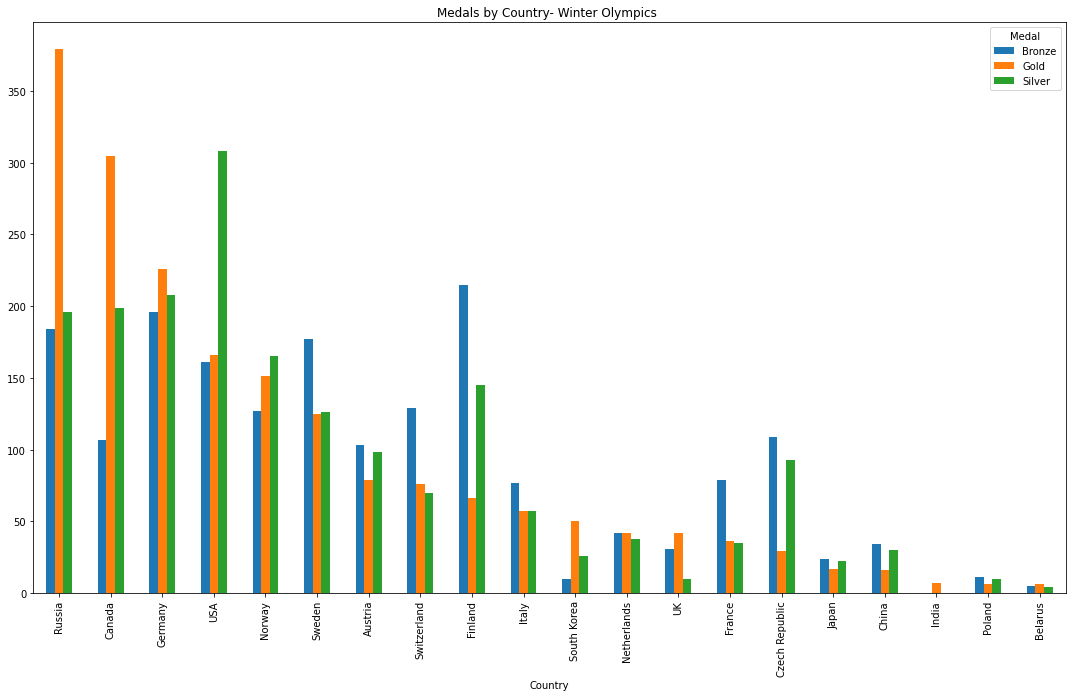

In [42]:
winter_medals_20.plot(kind='bar')
plt.xlabel('Country')
plt.title('Medals by Country- Winter Olympics ')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [43]:
year=df['Year'].value_counts()

Number of participants by year

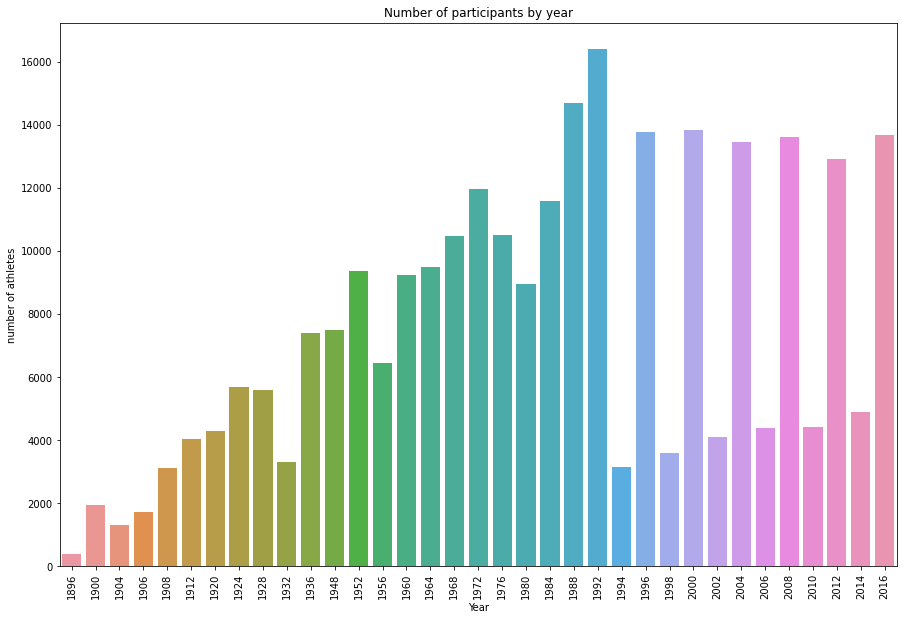

In [44]:
plt.figure(figsize=(15,10))
sns.barplot(x=year.index, y=year.values)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("number of athletes")
plt.title("Number of participants by year")
plt.show()

In [45]:
year_sex_medal=df.groupby(['Year', 'Sex'])['Medal'].count().reset_index()

In [46]:
year_sex_medal.head()

,Year,Sex,Medal
0,1896,M,143
1,1900,F,13
2,1900,M,591
3,1904,F,10
4,1904,M,476


In [47]:
year_sex_medal_pivot=year_sex_medal.pivot(index='Year', columns='Sex', values='Medal').fillna(0)

In [48]:
year_sex_medal_pivot.head()

Sex,F,M
Year,,
1896,0.0,143.0
1900,13.0,591.0
1904,10.0,476.0
1906,6.0,452.0
1908,16.0,815.0


Number of participants by year and gender

<Figure size 1440x720 with 0 Axes>

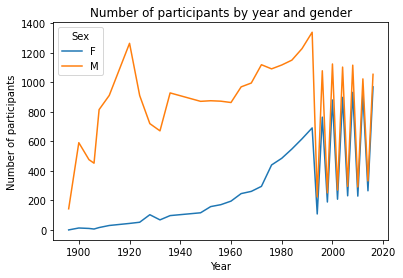

In [49]:
plt.figure(figsize=(20, 10))
fig=plt.gcf()
year_sex_medal_pivot.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of participants')
plt.title('Number of participants by year and gender')
plt.show()

In [50]:
df['Team'].unique()

array(['China', 'Denmark', 'Denmark/Sweden', ..., 'Solos Carex',
       'Dow Jones', 'Digby'], dtype=object)

In [51]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

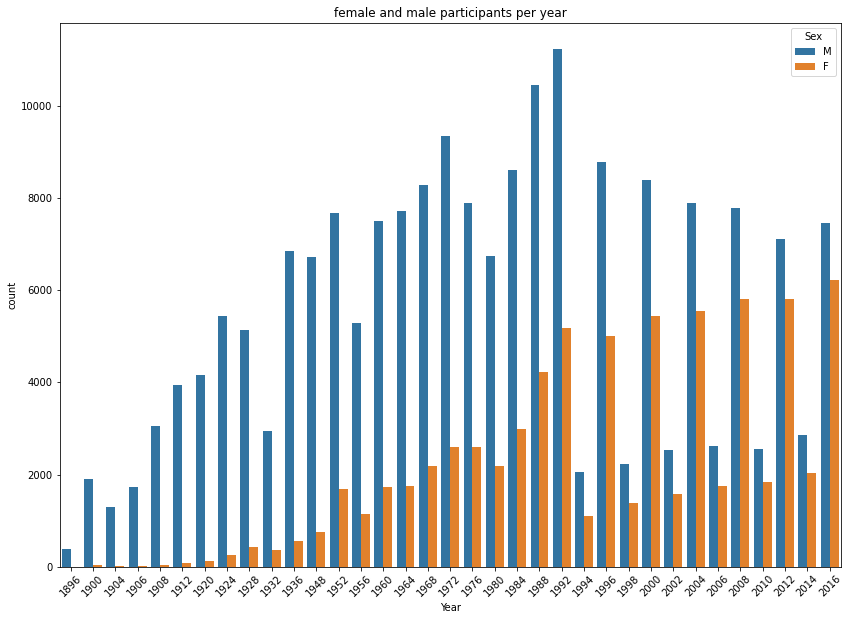

In [52]:
plt.figure(figsize=(14,10))
sns.countplot(x='Year', hue='Sex', data=df)
plt.xticks(rotation=45)
plt.title('female and male participants per year')
plt.show()

In [53]:
sport=df['Sport'].value_counts()[:5]
print(sport)

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64


In [54]:
sport_summer=df[df['Season']=='Summer']['Sport'].value_counts().sort_values(ascending=False).head(20)

In [55]:
sport_summer

Athletics           38624
Gymnastics          26707
Swimming            23195
Shooting            11448
Cycling             10859
Fencing             10735
Rowing              10595
Wrestling            7154
Football             6745
Sailing              6586
Equestrianism        6344
Canoeing             6171
Boxing               6047
Hockey               5417
Basketball           4536
Weightlifting        3937
Water Polo           3846
Judo                 3801
Handball             3665
Art Competitions     3578
Name: Sport, dtype: int64

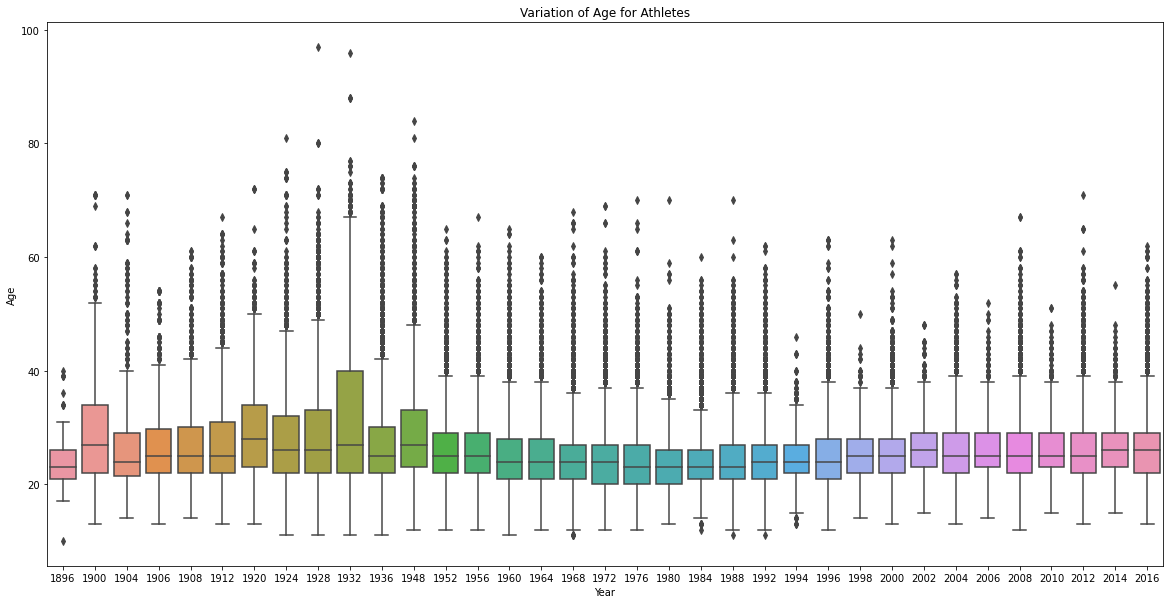

In [56]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Year', y='Age', data=df)
plt.title('Variation of Age for Athletes')
plt.show()

In [57]:
sport=df['Sport'].value_counts()[:5]
print(sport)

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64


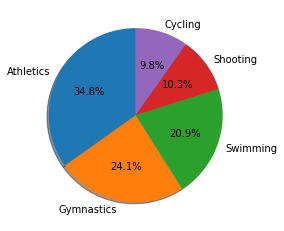

In [58]:
labels=sport.index
sizes=sport.values
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,startangle=90)
plt.show()

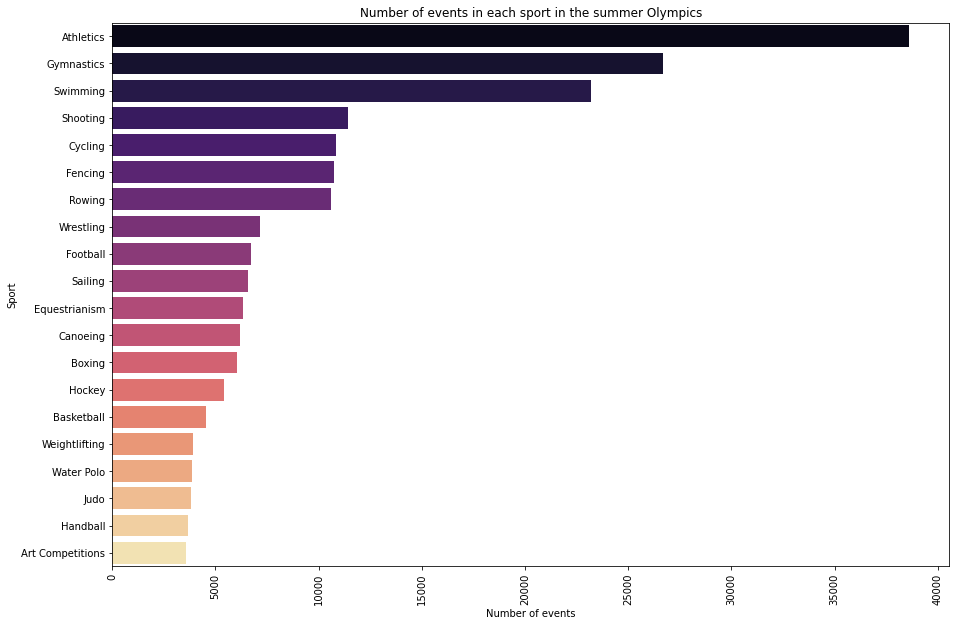

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(y=sport_summer.index, x=sport_summer.values, palette='magma')
plt.xlabel('Number of events')
plt.ylabel('Sport')
plt.xticks(rotation=90)
plt.title("Number of events in each sport in the summer Olympics")
plt.show()

In [60]:
sport_winter=df[df['Season']=='Winter']['Sport'].value_counts().sort_values(ascending=False)

In [61]:
sport_winter.head()

Cross Country Skiing    9133
Alpine Skiing           8829
Speed Skating           5613
Ice Hockey              5456
Biathlon                4893
Name: Sport, dtype: int64

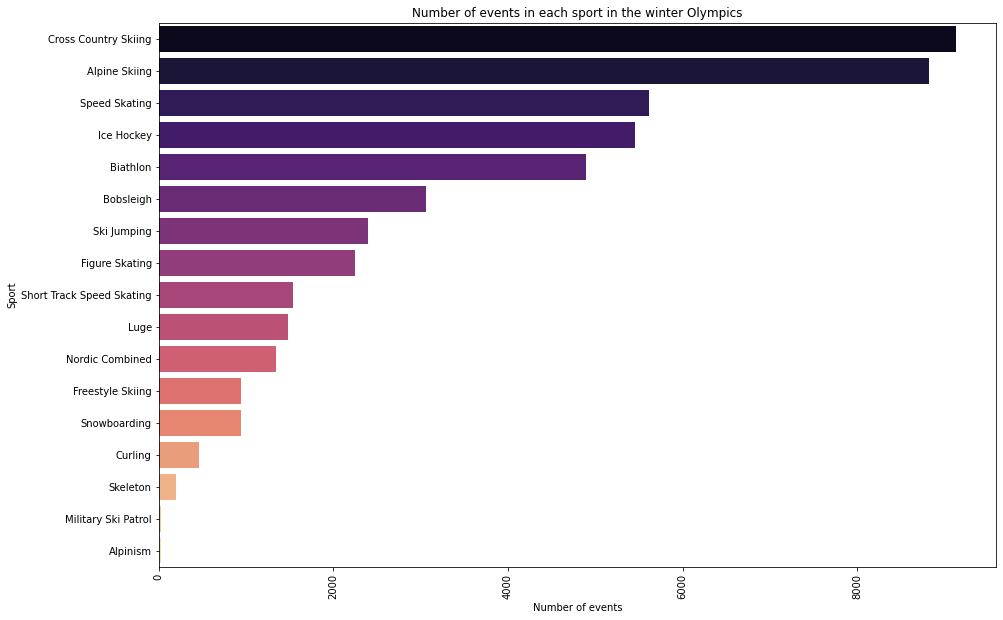

In [62]:
plt.figure(figsize=(15,10))
sns.barplot(y=sport_winter.head(20).index, x=sport_winter.head(20).values, palette='magma')
plt.xlabel('Number of events')
plt.ylabel('Sport')
plt.xticks(rotation=90)
plt.title("Number of events in each sport in the winter Olympics")
plt.show()

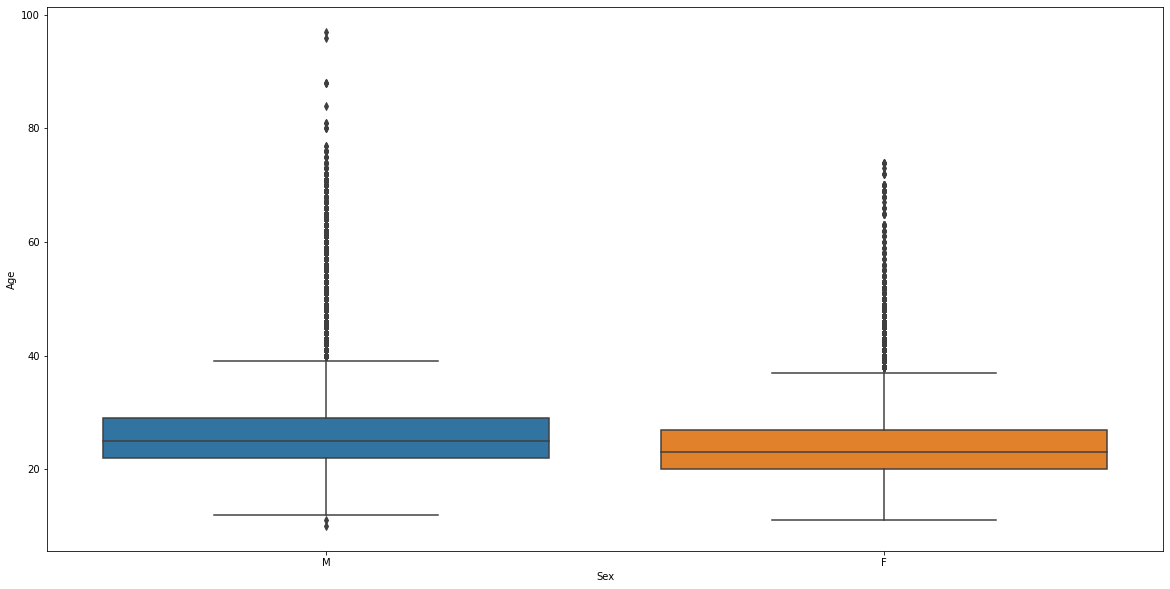

In [63]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Sex', y='Age', data=df)
plt.show()

Number of athletes for each sport in the winter games

In [64]:
data=df[df['Season']=='Winter'].groupby('Sport')['ID'].count().reset_index()

In [65]:
data.head()

,Sport,ID
0,Alpine Skiing,8829
1,Alpinism,21
2,Biathlon,4893
3,Bobsleigh,3058
4,Cross Country Skiing,9133


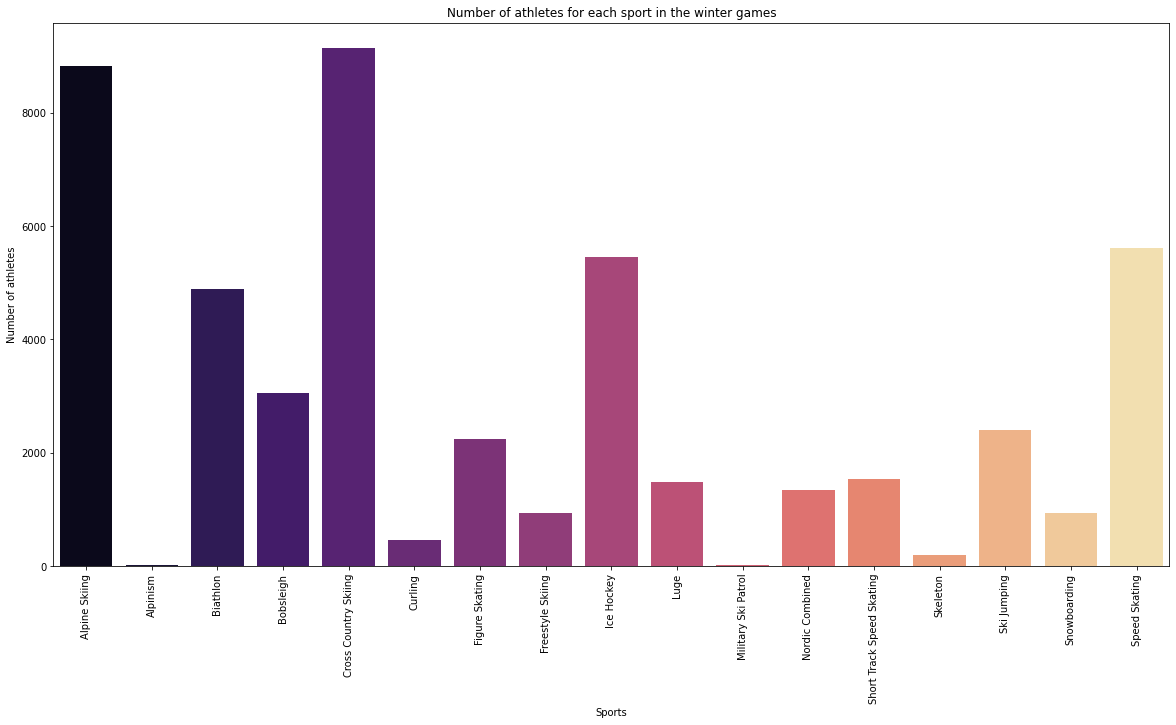

In [66]:
plt.figure(figsize=(20,10))
sns.barplot(x='Sport', y='ID', data=data,palette='magma')
plt.title('Number of athletes for each sport in the winter games')
plt.xlabel('Sports')
plt.ylabel('Number of athletes')
plt.xticks(rotation=90)
plt.show()

An indication how many countries attend each year

In [67]:
df2=df.groupby('Year')['region'].nunique().reset_index()

In [68]:
df2.head()

,Year,region
0,1896,12
1,1900,31
2,1904,14
3,1906,20
4,1908,22


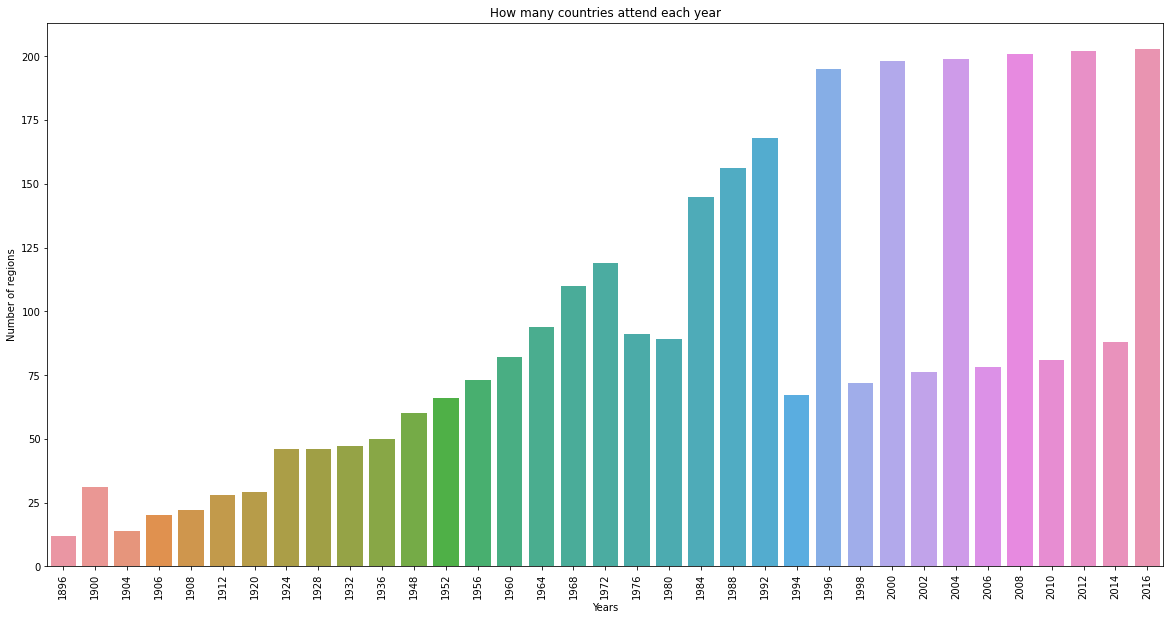

In [69]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='region', data=df2)
plt.title('How many countries attend each year')
plt.xlabel('Years')
plt.ylabel('Number of regions')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


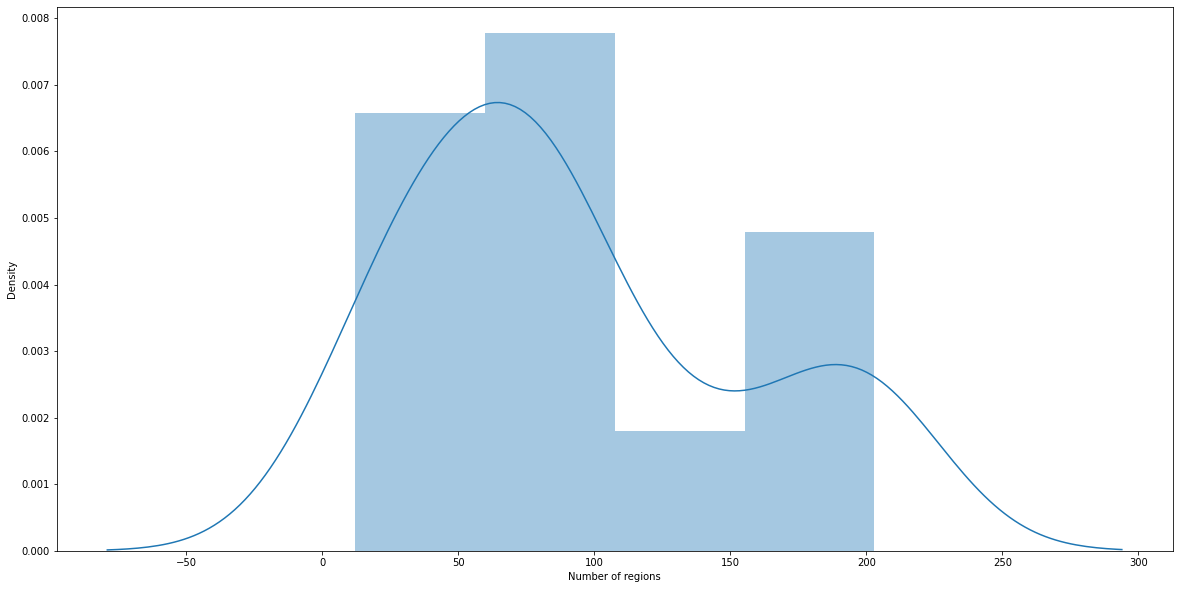

In [70]:
plt.figure(figsize=(20,10))
sns.distplot(df2['region'])
plt.xlabel('Number of regions')
plt.show()